In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [2]:
import pathlib

In [34]:
BASE_DIR = pathlib.Path().resolve().parent
DATASET_PATH = os.path.join(BASE_DIR, "datasets/input/data.xlsx")

IMAGE_DIR = BASE_DIR / "images"

IMAGE_DIR.mkdir(exist_ok=True, parents=True)

In [12]:
bank_df=  pd.read_excel(DATASET_PATH, engine='openpyxl')

In [13]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


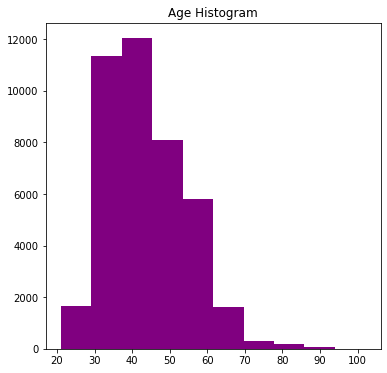

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.hist(x=bank_df.age, bins=10, align='right', color='purple')
plt.title("Age Histogram")
plt.savefig(os.path.join(IMAGE_DIR , "Age_histogram.png"))

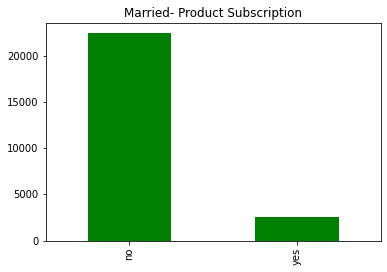

In [45]:
bank_df[bank_df["marital"] == "married"]['y'].value_counts().plot(kind='bar', color= 'green', title = "Married- Product Subscription")
plt.savefig(os.path.join(IMAGE_DIR, "Married- Product-Subscription"))

In [46]:
bank_df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [49]:
for idx, status in enumerate(bank_df.marital.unique()):
    print(bank_df[bank_df["marital"] == status]['y'].value_counts())

no     22396
yes     2532
Name: y, dtype: int64
no     9948
yes    1620
Name: y, dtype: int64
no     4136
yes     476
Name: y, dtype: int64
no     68
yes    12
Name: y, dtype: int64


In [70]:
df = bank_df[bank_df.marital == 'single']['y'].value_counts()
x = df.index
y = df.values
print(x, y)

Index(['no', 'yes'], dtype='object') [9948 1620]


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

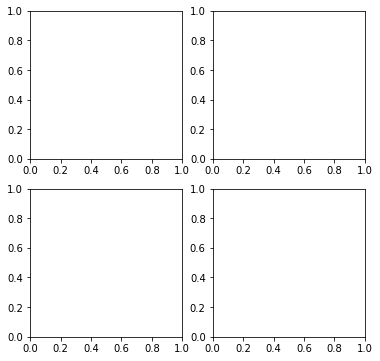

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
for idx, stat in enumerate(bank_df.marital.unique()):
    df = bank_df[bank_df.marital == stat]['y'].value_counts()
    x = df.index
    y = df.values
    ax[idx].plot(x, y)
    